In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Preprocessed Dataset
data = pd.read_csv("../data/income_cleaned.csv")

In [3]:
# Separate Features and Target Variable
X = data.drop("income", axis=1)
y = data["income"]

In [4]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# Load the Trained Model
best_model = joblib.load("../models/best_income_model_pipeline.pkl")

In [6]:
# Generate Predictions
y_pred = best_model.predict(X_test)

In [7]:
# Calculate Performance Metrics
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}")

# Generate detailed classification report 
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

✅ Test Accuracy: 0.8247

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4625
           1       0.68      0.63      0.65      1632

    accuracy                           0.82      6257
   macro avg       0.77      0.76      0.77      6257
weighted avg       0.82      0.82      0.82      6257



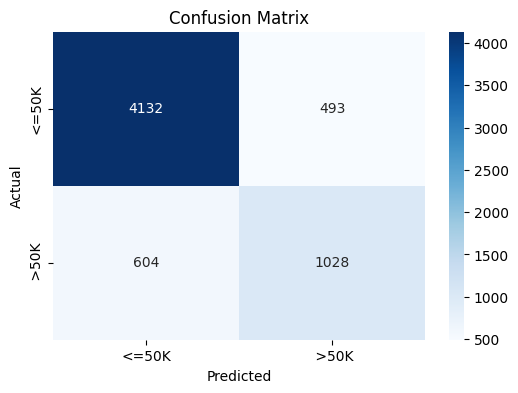

In [8]:
# Create a confusion matrix to visualize prediction performance
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["<=50K"," >50K"], yticklabels=["<=50K"," >50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Analyze Feature Importance (If Available)

if hasattr(best_model, "feature_importances_"):
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
    plt.title("Top 10 Important Features")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()
else:
    print("\nℹ️ Feature importance is not available for this model.")


ℹ️ Feature importance is not available for this model.


In [10]:
# Visualize Logistic Regression Coefficients
if hasattr(best_model, "coef_"):
    coefficients = pd.Series(best_model.coef_[0], index=X.columns)
    # Get top coefficients by absolute value (both positive and negative influence)
    top_coeffs = coefficients.abs().sort_values(ascending=False).head(10).index
    top_coeffs_values = coefficients[top_coeffs]
    
    plt.figure(figsize=(10,6))
    colors = ['red' if c < 0 else 'green' for c in top_coeffs_values]
    sns.barplot(x=top_coeffs_values, y=top_coeffs, palette=colors)
    plt.title("Top 10 Features by Coefficient Magnitude")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.show()